<a href="https://colab.research.google.com/github/SANKARM18/computer-vision/blob/main/unit2-Size%20Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 12.1M/12.1M [00:00<00:00, 184MB/s]

Extracting files...
Dataset downloaded at: /root/.cache/kagglehub/datasets/draaslan/blood-cell-detection-dataset/versions/1



/tmp/ipython-input-3689545581.py:35: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  shrinked = morphology.erosion(binary, morphology.square(3))
/tmp/ipython-input-3689545581.py:37: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  shrinked = morphology.erosion(shrinked, morphology.square(3))
/tmp/ipython-input-3689545581.py:42: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  expanded = morphology.dilation(expanded, morphology.square(3))


Loaded images: 5


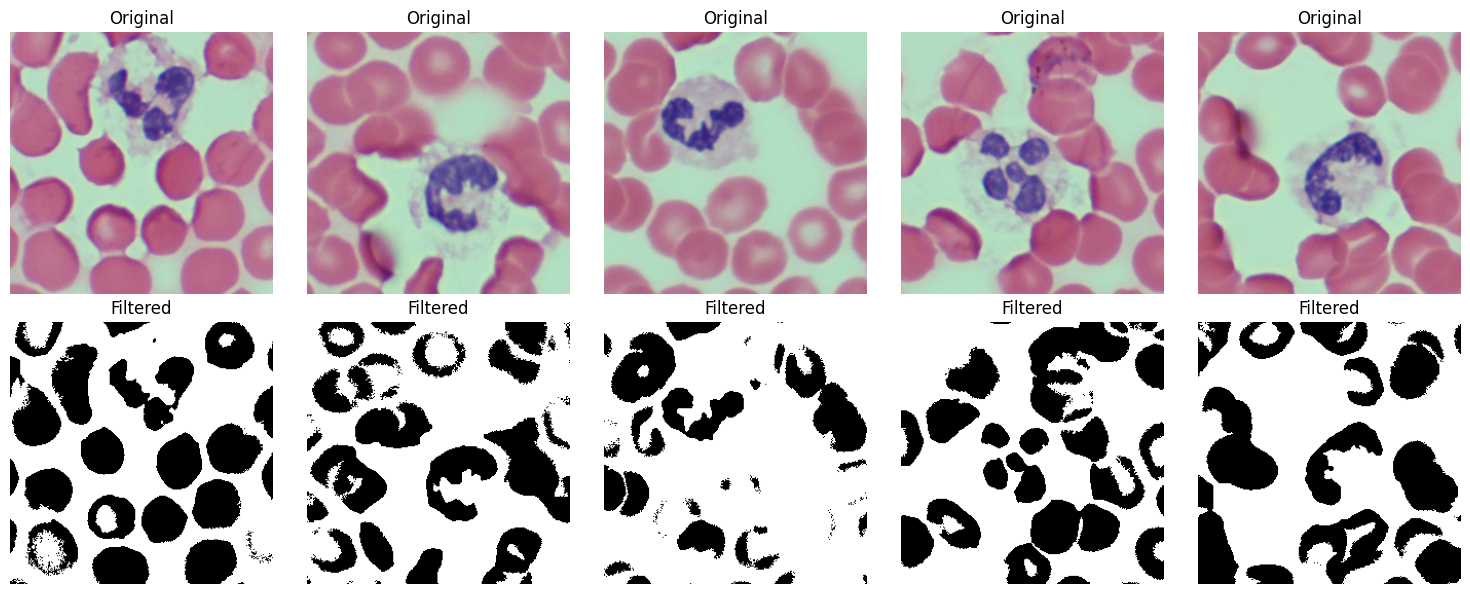

In [ ]:
# Install Required Packages
!pip install -q kagglehub scikit-image opencv-python matplotlib

# Import Libraries
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import morphology, io, img_as_ubyte
import kagglehub

# Download Kaggle Dataset
dataset_path = kagglehub.dataset_download("draaslan/blood-cell-detection-dataset")
print("Dataset downloaded at:", dataset_path)

# Load Images
image_folder = os.path.join(dataset_path, "images")
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".png")]

# Load first 5 images
images = [io.imread(f) for f in image_files[:5]]
print("Loaded images:", len(images))


# Define Size Filtering Function
def size_filter(image, shrink_iterations=2):
    # Convert to grayscale if RGB
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Binary thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Morphological erosion
    shrinked = morphology.erosion(binary, morphology.square(3))
    for _ in range(1, shrink_iterations):
        shrinked = morphology.erosion(shrinked, morphology.square(3))

    # Morphological dilation
    expanded = shrinked
    for _ in range(shrink_iterations):
        expanded = morphology.dilation(expanded, morphology.square(3))

    # Morphological reconstruction
    restored = morphology.reconstruction(expanded.astype(bool), binary.astype(bool))

    return img_as_ubyte(restored)


# Apply Filter and Visualize Results
plt.figure(figsize=(15, 6))

for idx, img in enumerate(images):
    filtered_img = size_filter(img, shrink_iterations=2)

    # Original image
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Filtered image
    plt.subplot(2, 5, idx + 6)
    plt.imshow(filtered_img, cmap='gray')
    plt.title("Filtered")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')